<a href="https://colab.research.google.com/github/BrightonOtieno/Fashion-mnist-Tensorflow-NNets/blob/master/Neural_Network_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
% tensorflow_version 2.x #needed in the notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #needed in the notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# fashion Mnist DataSet

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
type(train_images)

numpy.ndarray

## 60,000 images each 28 by 28 pixels meaning (784px) in total for a single image

### Take a look at image of index 0 and grab one of its pixel
#### Pixels are arranged in rows and columns
#### 28 rows and 28 columns

In [6]:
train_images[0,23,23]

194

### The entire Train Dataset

In [7]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names =[
              'T-shirt/top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot'
]

In [10]:
def showImage(imageIndex):
    plt.figure()
    plt.imshow(train_images[imageIndex])
    plt.colorbar()
    #plt.grid(False)
    plt.show()



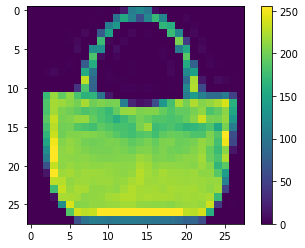

In [11]:
showImage(100)

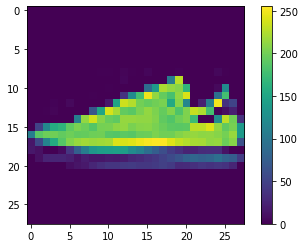

In [12]:
 showImage(6)

# Data preprocessing 
## scale down the grayscale values (0-255)  to the values between (0-1)

In [13]:
train_images = train_images/255.0
test_images = test_images/255.0

# Defining Model  Architecture
* layers 
* number  of neurons,
* connections,activation functions for ( hidden and Output)layers

In [14]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

# Compile Model
## Defining other parameters
* optimizer
* loss function
* metrics for measuring the performance

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Actual Training

In [18]:
model.fit(train_images,train_labels,epochs=10) # epochs is also a hyperParameter

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5010 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

# Prediction
---
# Always comes BEFORE ACCUCACY TESTING

In [19]:
print(test_images.shape) # 10,000 images each of 28 by 28 px

(10000, 28, 28)


In [20]:
predictions = model.predict(test_images)


In [21]:
print(predictions)

[[4.51745478e-07 2.11520142e-11 2.95196957e-11 ... 4.02837098e-02
  2.10224059e-07 9.55050230e-01]
 [4.90293351e-05 1.25605576e-14 9.99685407e-01 ... 9.77617883e-20
  2.90198698e-11 4.45731071e-18]
 [3.55360719e-08 1.00000000e+00 4.66500233e-12 ... 1.34647608e-27
  3.13885799e-13 1.88567686e-19]
 ...
 [1.57703892e-06 5.85457793e-10 5.45769979e-07 ... 8.34705013e-11
  9.99944568e-01 4.46923271e-12]
 [1.15090259e-07 9.99994636e-01 2.96279529e-10 ... 3.24267660e-20
  6.27725996e-11 1.13178496e-13]
 [1.06851767e-05 6.57520616e-09 5.58379782e-07 ... 1.46011310e-03
  2.05785454e-05 2.85649912e-06]]


In [22]:
# Get first prediction(at index 0)
predictions[0]

array([4.51745478e-07, 2.11520142e-11, 2.95196957e-11, 1.35905315e-11,
       1.33945317e-08, 4.66534169e-03, 6.18103257e-09, 4.02837098e-02,
       2.10224059e-07, 9.55050230e-01], dtype=float32)

# Returns A list of probability distribution
## Probability / likelyhood of the (input) being 
* a:
              'T-shirt/top',

              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot'  

* info from all the 10 output neurons
* Probability is spread around those neurons such that they sum up to 1

---
## Gett the INDEX of the  highest  Probability 
* using **np.argmax()** function
---

In [23]:
print(predictions[0])

[4.51745478e-07 2.11520142e-11 2.95196957e-11 1.35905315e-11
 1.33945317e-08 4.66534169e-03 6.18103257e-09 4.02837098e-02
 2.10224059e-07 9.55050230e-01]


In [24]:
print(np.argmax(predictions[0]))

9


# Use retuned Index to Grab its class name

In [31]:

def ShowPredictedImage(predictionIndex):
    predictions = model.predict(test_images)
    prediction= predictions[predictionIndex] # gets a (single prediction)) from Predictions array
    print(prediction)
    print('------------------')
    predicted_class_index = np.argmax(prediction) # returns the (index) for the Predicted Class
    print(predicted_class_index)
    print('------------------')

    print(class_names[predicted_class_index]) # Gets the (Actual Class Name using the index)
    print('------------------')
    classIndex = predictionIndex
    plt.figure()
    plt.imshow(test_images[classIndex])
    plt.colorbar()
    #plt.grid(False)
    plt.show()




# Pick any index between (0-9)

[2.4635815e-03 1.8051246e-04 9.6571988e-01 3.9753851e-07 3.0782863e-02
 1.2575573e-09 7.2532461e-04 4.9592520e-05 7.7952456e-05 7.2970070e-09]
------------------
2
------------------
Pullover
------------------


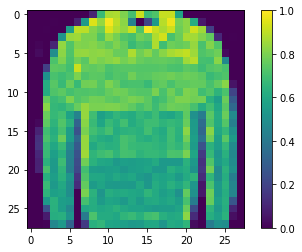

In [43]:
ShowPredictedImage(20)

# Model Testing and Evaluation

In [26]:
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=1)
print('test Accuracy of :' ,test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8863
test Accuracy of : 0.8863000273704529


# 88% Testing Accuracy

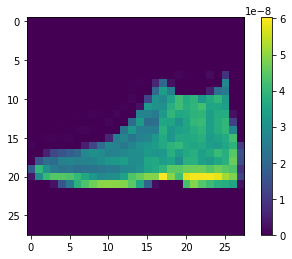